### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 16th at 11.59pm CDT
---

The first two homework problems this week are very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

## Problem 2


[This](https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.1&regularizationRate=0.01&noise=50&networkShape=3,2&seed=0.65406&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) data set is a noisy spiral. Obviously, a linear model will fail here, but even manually defined feature combinations may be hard to construct.

1. Train the best model you can, using just X1 and X2. Add or remove layers and neurons as you see fit, change learning settings like learning rate, regularization rate, and batch size. What is the best test loss you can get? How smooth is the model output surface?


2. Even with Neural Nets, some amount of feature engineering is often needed to achieve best performance. Try adding in additional cross product features or other transformations like sin(X1) and sin(X2). Do you get a better model? Is the model output surface any smoother?

## Problem 3

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other $10$th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

# Solutions

### Part 1.1

$f(x) = Wx + b$ where x is the vector input, W is the weights matrix, and b is the bias for each neuron

SRT: You have't answered whether it can learn any non-linearities, and what your network run showed. Plus this is a very general equation; I can't tell what your reasoning was for the linear activation, or if you thought about the single neuron connecting to the output, of which the latter has an activation too. -4

### Part 1.2

While with ReLu, it can section off one of the 4 corners as being a specific color, the other 3 corners will always be identified as the other color, even when a third of that remaining data is wrong. The single hidden layer and 2 neurons, it is only able to effectively quantify two 'lines' of separation, and when combined together, you can get a corner!

### Part 1.3

While run to run, it gets different solutions, the network is effectively able to place 3 separation lines on the data, then use those linear combinations to group them into colors. By allowing this third line, it is significantly better at categorization for this dataset. It can sometimes identify that opposite corners are the same color, but seemingly at random it will hone in on a local minimum solution where it identifies adjacent corners as a particular color and the other half has very low understanding and very little weight towards one or another color.

SRT: Good!


### Part 1.4

Using nearly the same settings as part 3 (i.e. Relu + 3 neurons) then adding in some amount of regularization (0.01), the network is able to get a test loss of 0.157 or less fairly consistently. It will still get stuck maybe 1 in 4 times, but the regularization helps it avoid the false peaks easier. However, this is still not a great fit overall and having it return multiple solutions on different runs is not ideal. Adding a second layer decreased the chances that it found a sub-par solution but still did not eliminate it. Adding multiple neurons to the second layer seemed to decrease the probability of a bad solution, but never eliminated it, and in each of these tests, only one of the neurons in the final layer seemed to have any weight to the final product. Adding more layers doesn't seem to change what solutions it finds, and the new neurons often have smaller weights attatched. Using the Tanh activation function however, produced fairly consistent results with one layer, and only 3 neurons. The only downside being that most solutions barely fall out with a test loss of ~0.180 on average. 

SRT: Good exploring.


### Part 1.5

In general, a more complex network slightly increase the chances how often it converges. Like was stated in question 1.4, very often with these complex networks, some of the neurons have very small weights attached to them, and in other cases, the neurons have very similar activation patterns as other neurons.

### Part 2.1

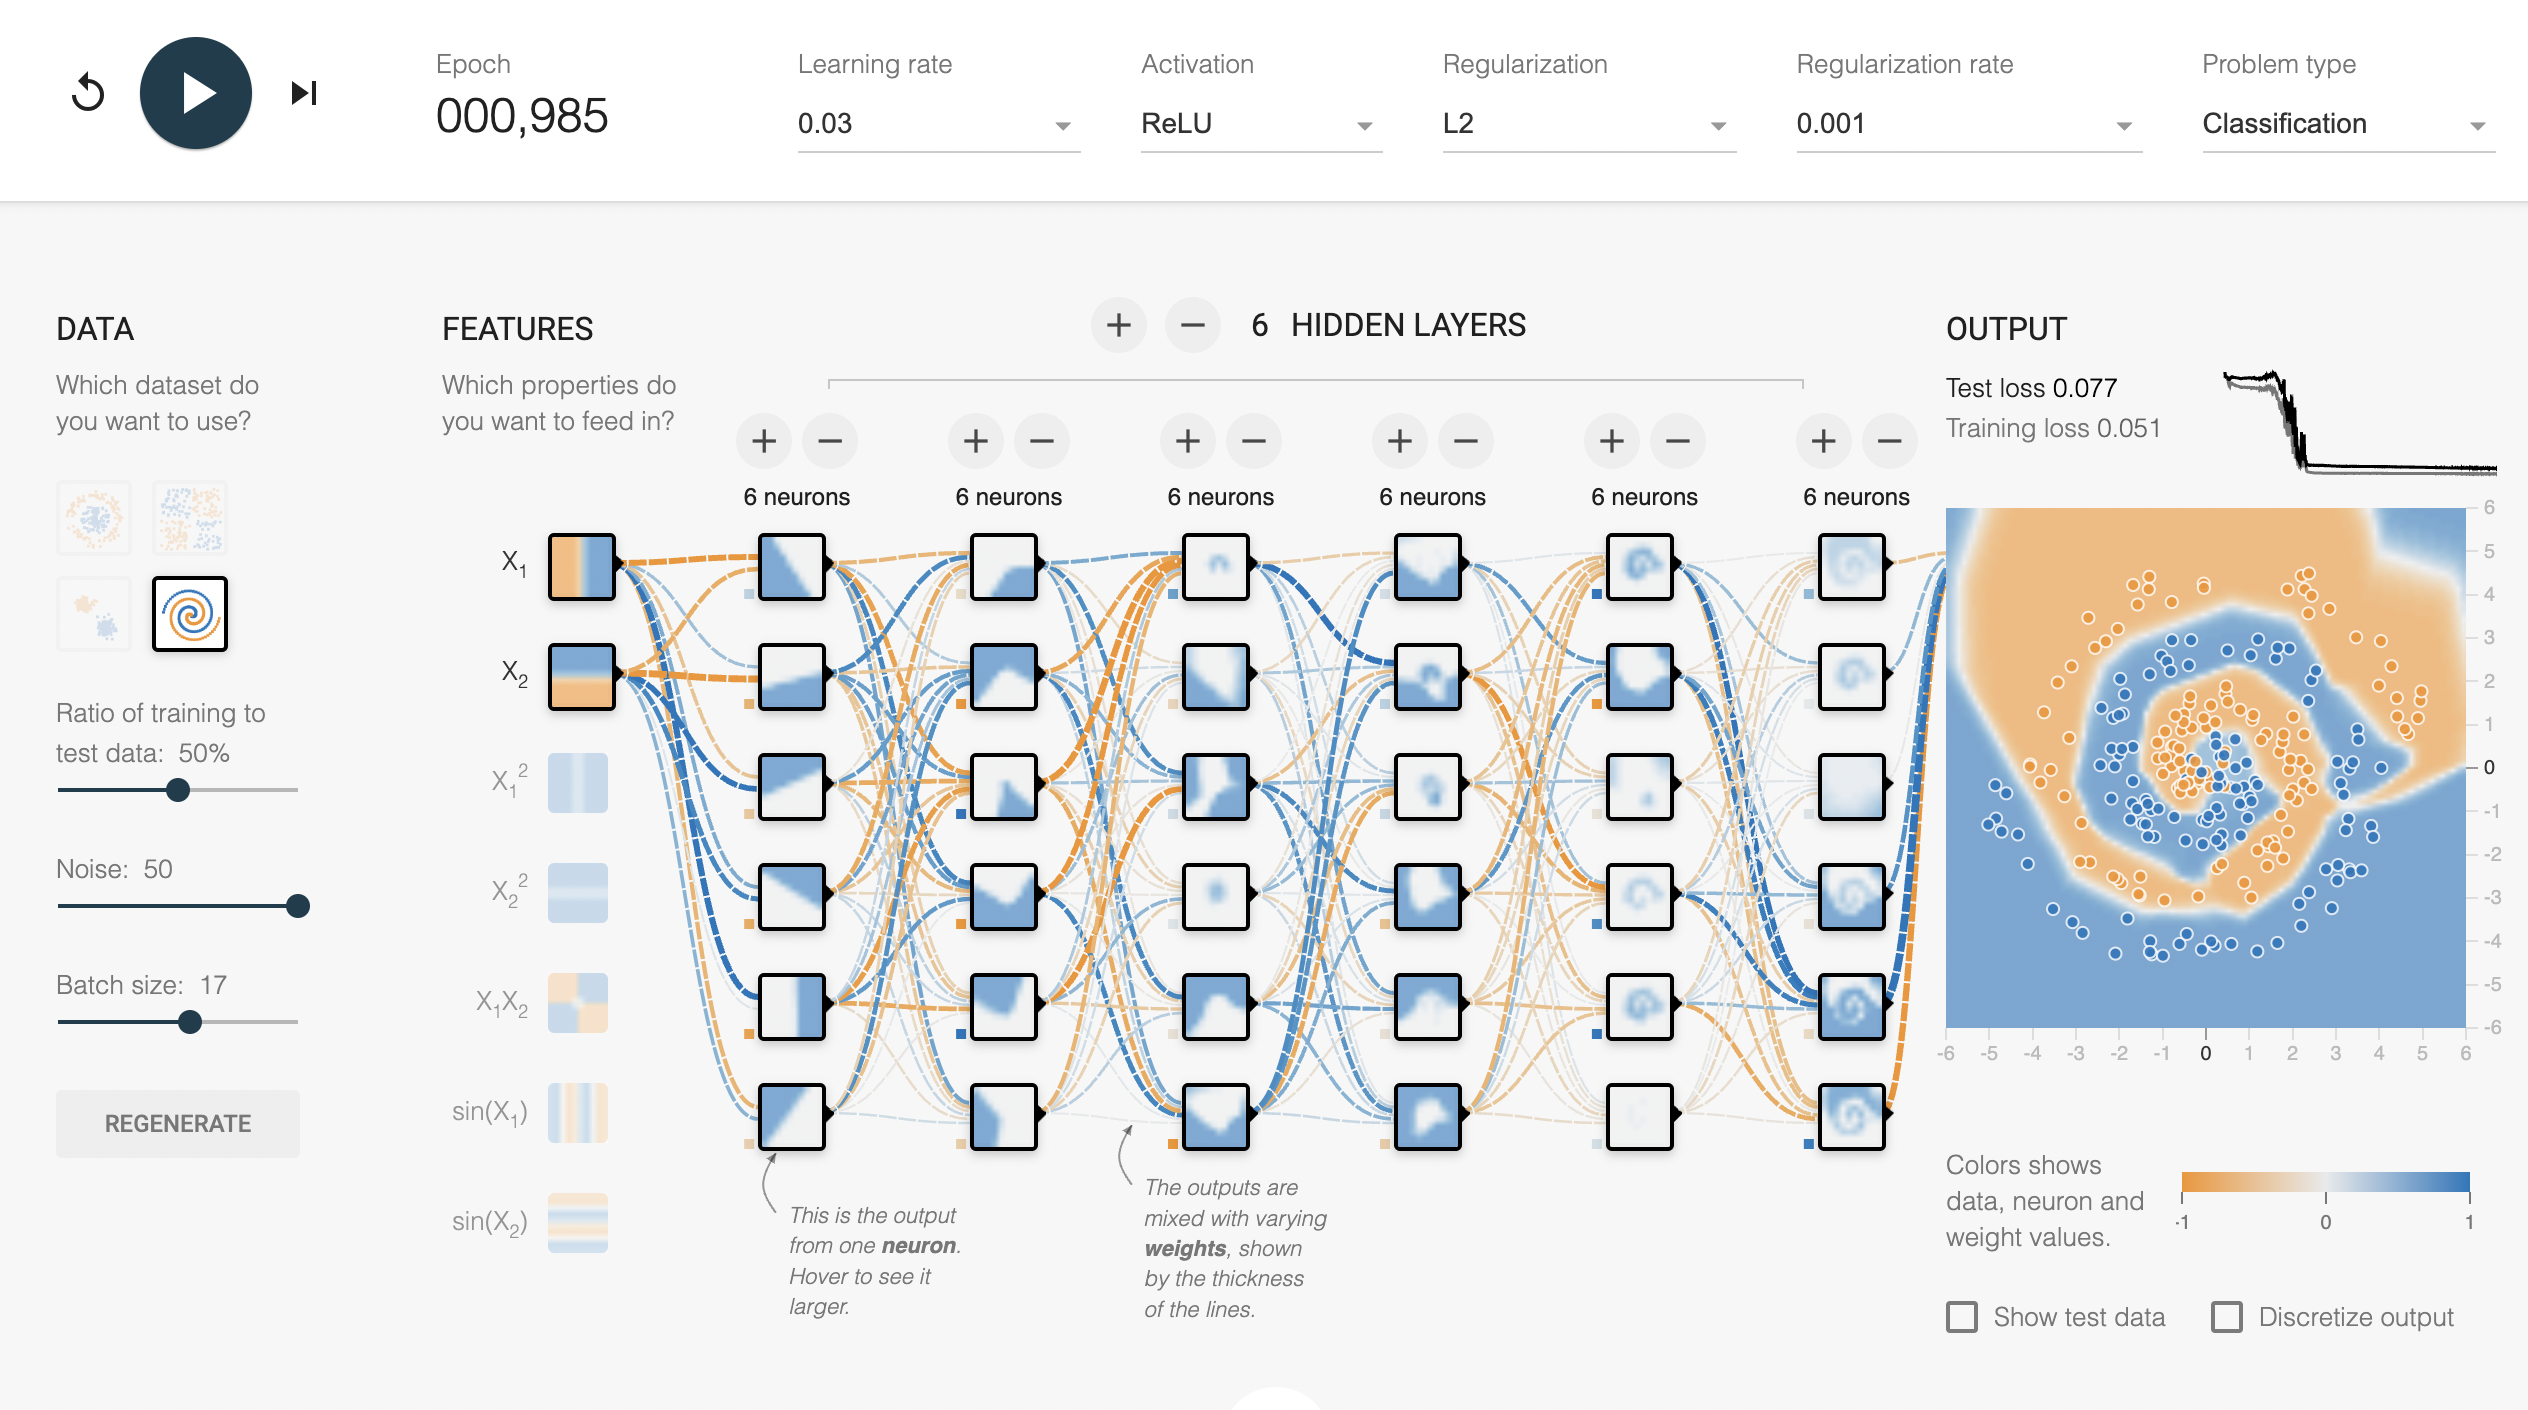
This was easily my best result. Unsurprisingly, having more layers allows the network to better estimate the non-linearity of the problem, because of that, I maxed out the number of layers allowed at 6. I also went with a fairly large number of neurons in each layer at 6, as well. This let the network find more details quickly, as even having one less neuron per layer results in a much longer runtime to find a solution, and the solutions themselves are less well described. I also decided to try and mess with the learning rate as the network ran. I started the learning rate at 0.1, but lowered it after it had some sort of spiral shape, which happened fairly quickly.

Overall, the surface itself is fairly smooth, thanks to the large numbers of neurons and layers. They definitely aren't smooth curves like one might expect, but the overall trend is fairly accurate. This however, likely won't scale with a larger spiral.

SRT: Impressive!


### Part 2.2

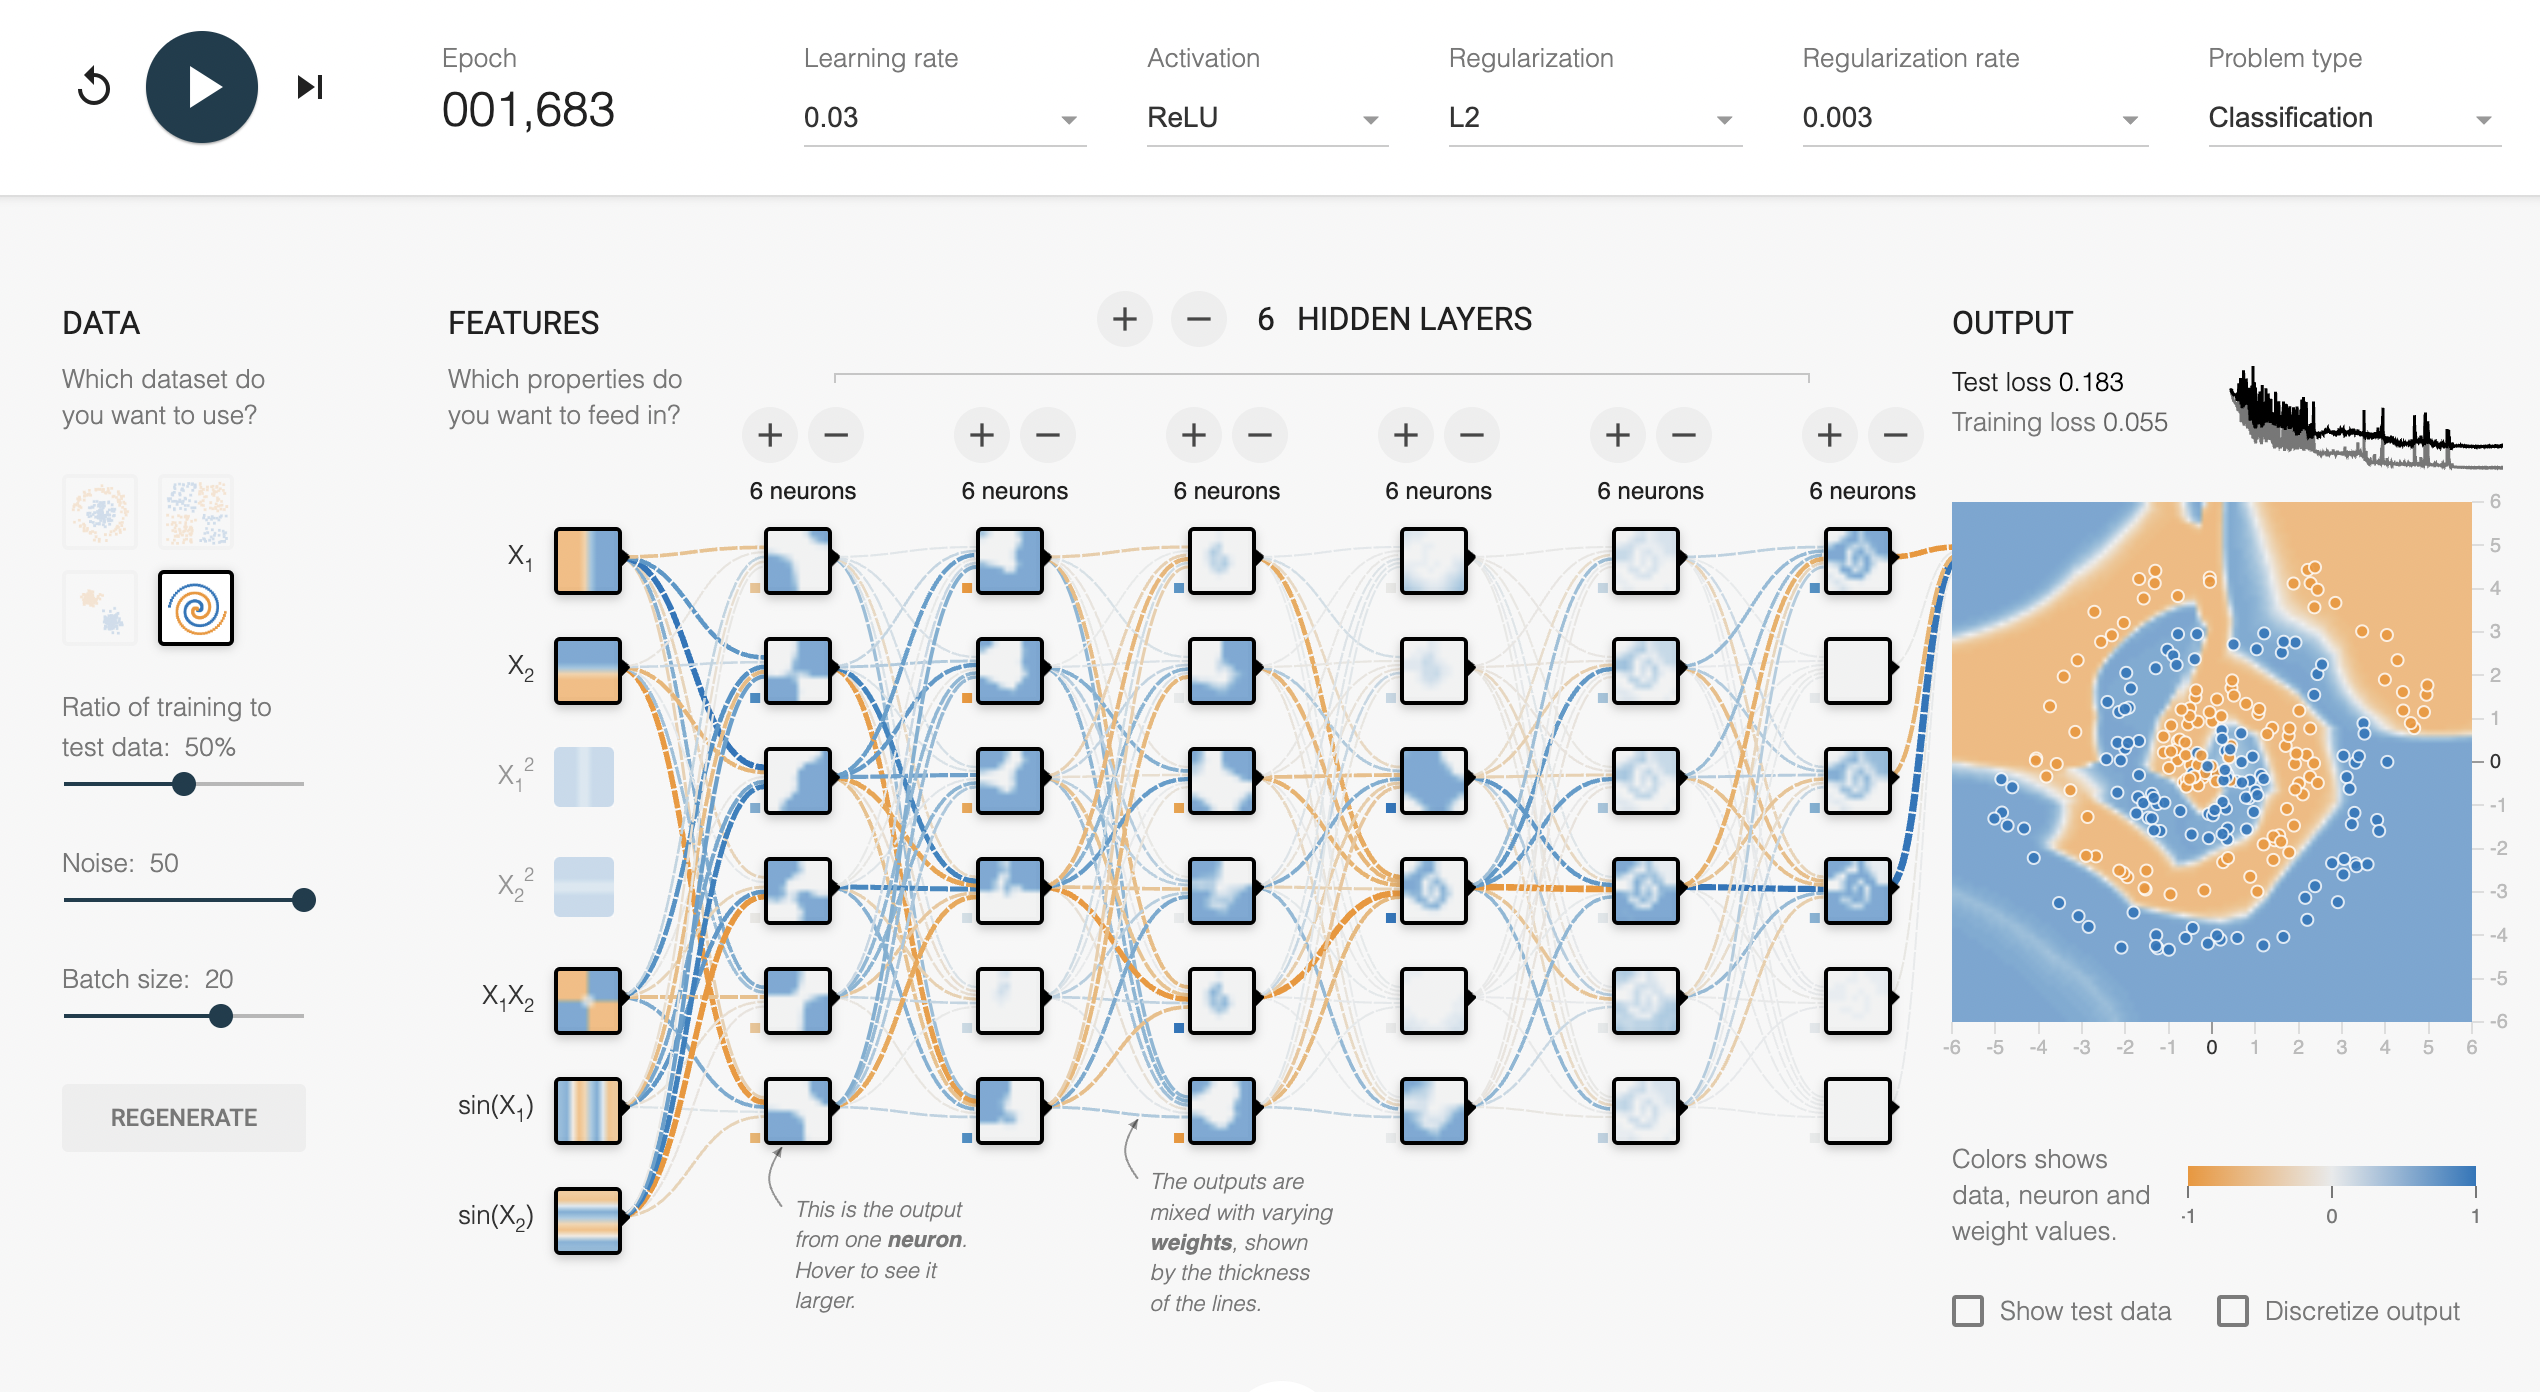
Adding more features does seem to smooth out the edges that the image had before, though it still is a poor fit. It also seems to separate the spiral into two shapes, which with more data, would completely ruin the classification. Similar to part 2.1, with a larger spiral, this network will likely fail. Having extra features likely requires longer runtimes to get an optimal solution as well. One feature that could be interesting would be a radial distance feature. As that combined with linear features could get some amount of spiral shape.

### Problem 3.1

In [1]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


%matplotlib inline
%config InlineBackend.figure_format='retina'

data = np.load('../../../homeworks/hw_data/hw8_data_1.npy')[::10]
print(data.dtype.names)
print(np.unique(data['specClass']))

#(𝑢−𝑔) , (𝑔−𝑟), (𝑟−𝑖), and (𝑖−𝑧)
ug = data['u']-data['g']
gr = data['g']-data['r']
ri = data['r']-data['i']
iz = data['i']-data['z']

redshift = data['redshift']

sp_class = np.zeros(len(data),int)
sp_class[np.where(data['specClass']=='QSO')] = 1

print(f'# Galaxies = {len(data)-np.sum(sp_class)}, # Quasars = {np.sum(sp_class)}')

('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')
['GALAXY' 'QSO']
# Galaxies = 4264, # Quasars = 736


### Part 3.2

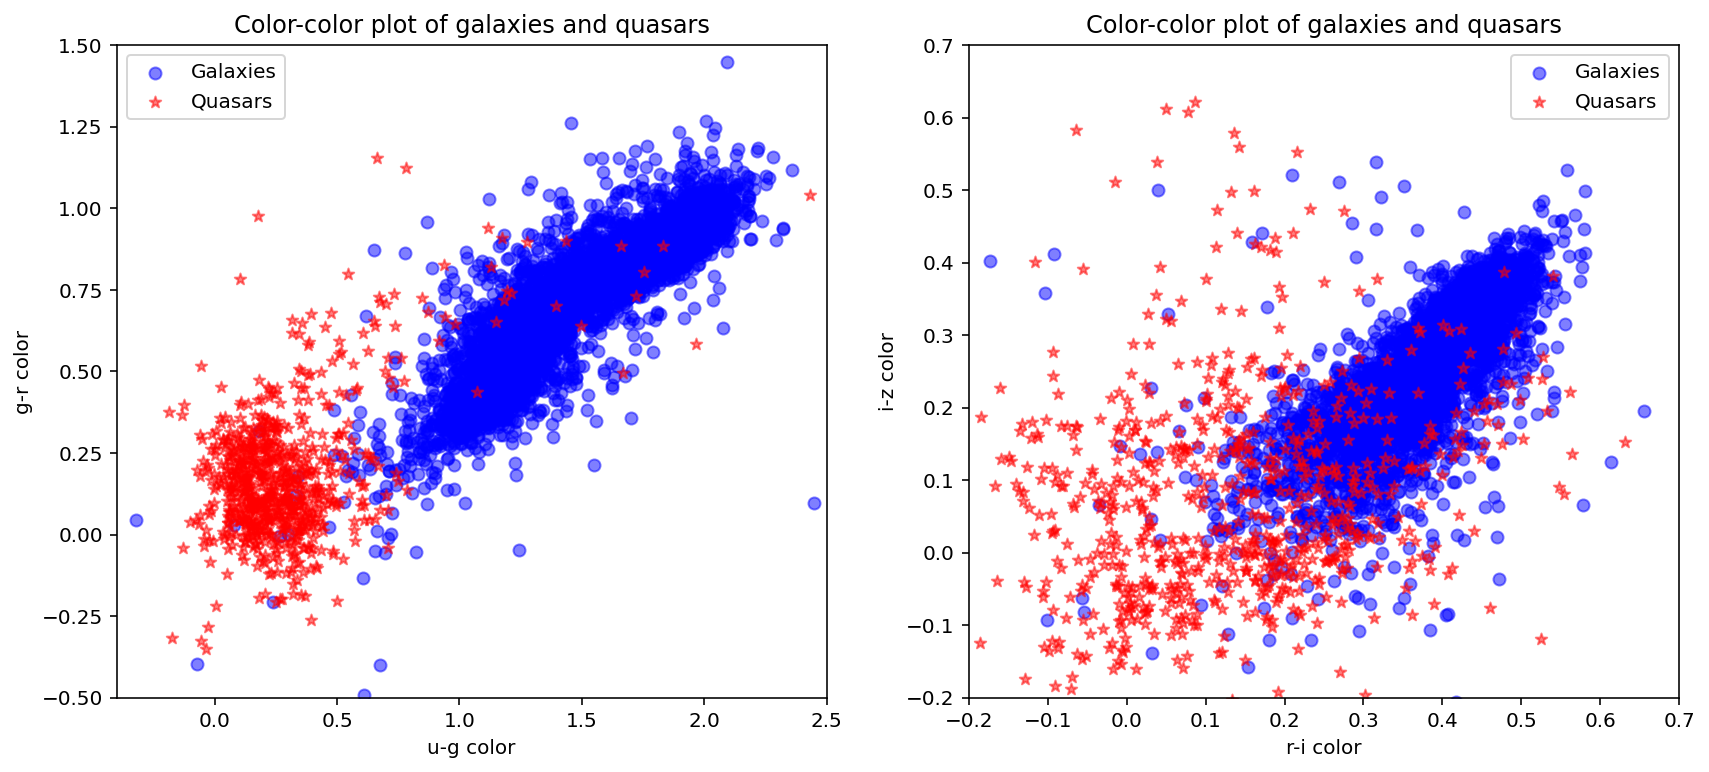

In [2]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)

plt.scatter(ug[np.where(sp_class!=1)],gr[np.where(sp_class!=1)],
            color='b',alpha=0.5,label='Galaxies')
plt.scatter(ug[np.where(sp_class==1)],gr[np.where(sp_class==1)],
            marker='*',color='r',alpha=0.5,label='Quasars')

plt.xlim((-0.4,2.5))
plt.ylim((-0.5,1.5))
plt.title('Color-color plot of galaxies and quasars')
plt.xlabel('u-g color')
plt.ylabel('g-r color')
plt.legend()

plt.subplot(1,2,2)

plt.scatter(ri[np.where(sp_class!=1)],iz[np.where(sp_class!=1)],
            color='b',alpha=0.5,label='Galaxies')
plt.scatter(ri[np.where(sp_class==1)],iz[np.where(sp_class==1)],
            marker='*',color='r',alpha=0.5,label='Quasars')

plt.xlim((-0.2,0.7))
plt.ylim((-0.2,0.7))
plt.title('Color-color plot of galaxies and quasars')
plt.xlabel('r-i color')
plt.ylabel('i-z color')
plt.legend()

plt.show()

### Part 3.3

In [3]:
X = np.array([ri,iz]).T
y = sp_class.T
print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5000, 2) (5000,)
(4000, 2) (1000, 2) (4000,) (1000,)


### Part 3.4

In [4]:
X_train_scale = preprocessing.scale(X_train)
X_test_scale = preprocessing.scale(X_test)

### Part 3.5

In [5]:
mlpc = MLPClassifier(hidden_layer_sizes=(5,2),activation='relu',solver='sgd',
                     max_iter=1000,random_state=42)

mlpc.fit(X_train_scale,y_train)

y_pred = mlpc.predict(X_test_scale)
y_prob = mlpc.predict_proba(X_test_scale)[:,np.where(mlpc.classes_==1)[0]]


#Plot ROC curve
fpr, tpr, thresh = roc_curve(y_test, y_prob)
    
#Get an accuracy score
score = accuracy_score(y_test,y_pred)

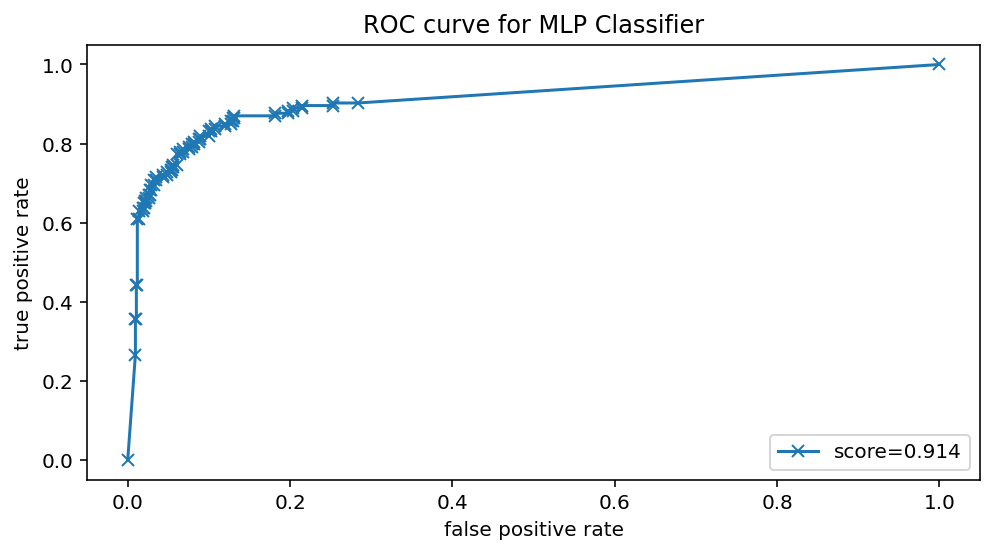

In [6]:
plt.figure(figsize=(8,4))
plt.plot(fpr,tpr,'-x',label=f'score={round(score,4)}')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title(f'ROC curve for MLP Classifier')
plt.legend(loc='lower right')
plt.show()

### Part 1.6

In [7]:
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}

grid = GridSearchCV(MLPClassifier(),param_grid=parameters,n_jobs=-1)
grid.fit(X_train_scale,y_train)

print(f'Best parameter values: {grid.best_params_}')

Best parameter values: {'activation': 'tanh', 'hidden_layer_sizes': (5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'adam'}


### Part 1.7

In [8]:
best_mlpc = MLPClassifier(hidden_layer_sizes=(5,5),activation='tanh',solver='adam',
                          max_iter=1000,random_state=42,)

best_mlpc.fit(X_train_scale,y_train)

best_y_pred = best_mlpc.predict(X_test_scale)
best_y_prob = best_mlpc.predict_proba(X_test_scale)[:,np.where(best_mlpc.classes_==1)[0]]


#Plot ROC curve
best_fpr, best_tpr, best_thresh = roc_curve(y_test, best_y_prob)
    
#Get an accuracy score
best_score = accuracy_score(y_test,best_y_pred)

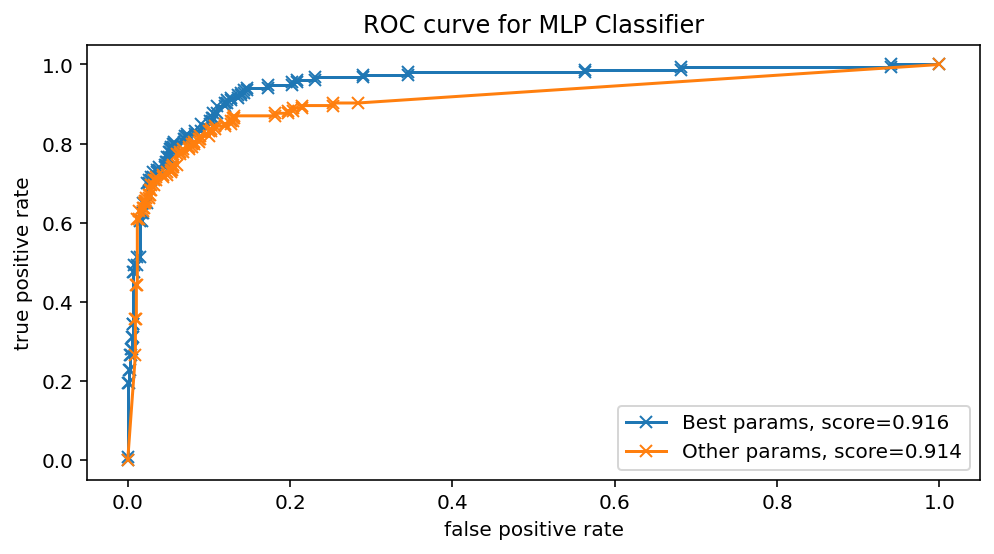

In [9]:
plt.figure(figsize=(8,4))

plt.plot(best_fpr,best_tpr,'-x',label=f'Best params, score={round(best_score,4)}')
plt.plot(fpr,tpr,'-x',label=f'Other params, score={round(score,4)}')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title(f'ROC curve for MLP Classifier')
plt.legend(loc='lower right')
plt.show()

SRT: Excellent!